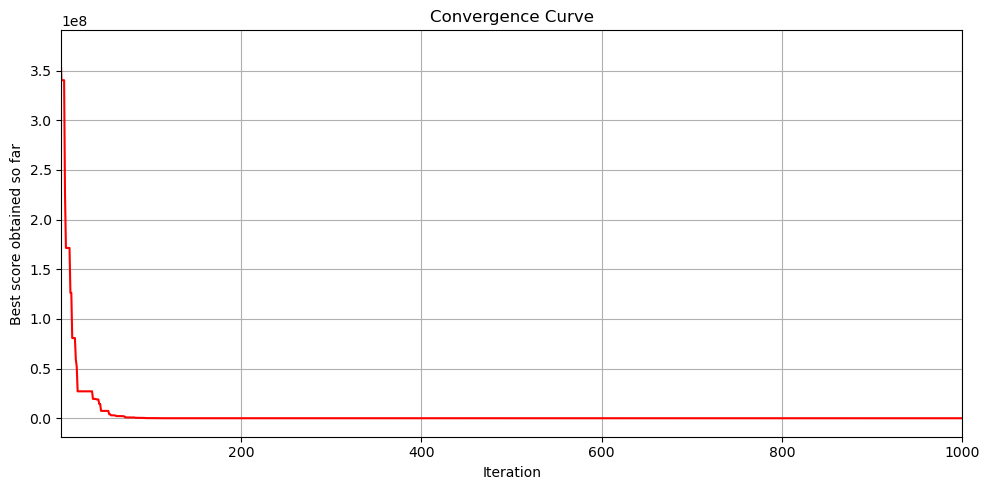

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def chung_reynolds(x):
    return np.sum((x ** 2) ** 2)

def initialization(pop_size, dim, ub, lb):
    x = np.random.rand(pop_size, dim) * (ub - lb) + lb
    return x

def PKO(pop_size, max_iter, lb, ub, dim, fit_func):
    start_time = time.time()
    BF = 8  
    Crest_angles = 2 * np.pi * np.random.rand()
    X = initialization(pop_size, dim, ub, lb)
    Fitness = np.array([fit_func(ind) for ind in X])
    
    sorted_indices = np.argsort(Fitness)
    Best_position = X[sorted_indices[0], :].copy()
    Best_fitness = Fitness[sorted_indices[0]]
    Convergence_curve = np.zeros(max_iter)
    Convergence_curve[0] = Best_fitness
    t = 1
    PEmax = 0.5
    PEmin = 0

    while t < max_iter:
        o = np.exp(-t / max_iter) ** 2
        X_1 = np.copy(X)
        for i in range(pop_size):
            if np.random.rand() < 0.8:  
                j = i
                while j == i:
                    j = np.random.randint(pop_size)
                beating_rate = np.random.rand() * Fitness[j] / (Fitness[i] + 1e-8)
                alpha = 2 * np.random.randn(dim) - 1
                if np.random.rand() < 0.5:
                    T = beating_rate - ((t) ** (1 / BF) / (max_iter) ** (1 / BF))
                    X_1[i, :] = X[i, :] + alpha * T * (X[j, :] - X[i, :])
                else:
                    T = (np.exp(1) - np.exp(((t - 1) / max_iter) ** (1 / BF))) * np.cos(Crest_angles)
                    X_1[i, :] = X[i, :] + alpha * T * (X[j, :] - X[i, :])
            else:  
                alpha = 2 * np.random.randn(dim) - 1
                b = X[i, :] + o ** 2 * np.random.randn(dim) * Best_position
                HuntingAbility = np.random.rand() * Fitness[i] / (Best_fitness + 1e-8)
                X_1[i, :] = X[i, :] + HuntingAbility * o * alpha * (b - Best_position)

    
        for i in range(pop_size):
            X_1[i, :] = np.clip(X_1[i, :], lb, ub)
            fitness_new = fit_func(X_1[i, :])
            if fitness_new < Fitness[i]:
                Fitness[i] = fitness_new
                X[i, :] = X_1[i, :].copy()
            if Fitness[i] < Best_fitness:
                Best_fitness = Fitness[i]
                Best_position = X[i, :].copy()

        
        PE = PEmax - (PEmax - PEmin) * (t / max_iter)
        for i in range(pop_size):
            alpha = 2 * np.random.randn(dim) - 1
            if np.random.rand() > (1 - PE):
                r1, r2 = np.random.randint(pop_size), np.random.randint(pop_size)
                X_1[i, :] = X[r1, :] + o * alpha * np.abs(X[i, :] - X[r2, :])
            else:
                X_1[i, :] = X[i, :].copy()

            X_1[i, :] = np.clip(X_1[i, :], lb, ub)
            fitness_new = fit_func(X_1[i, :])
            if fitness_new < Fitness[i]:
                Fitness[i] = fitness_new
                X[i, :] = X_1[i, :].copy()
            if Fitness[i] < Best_fitness:
                Best_fitness = Fitness[i]
                Best_position = X[i, :].copy()

        Convergence_curve[t] = Best_fitness
        t += 1

    elapsed_time = time.time() - start_time
    return Best_fitness, Best_position, Convergence_curve

dim = 30
search_agents_no = 50
max_iter = 1000
lb = -100
ub = 100
fit_func = chung_reynolds

best_fitness, best_position, convergence_curve = PKO(search_agents_no, max_iter, lb, ub, dim, fit_func)

plt.figure(figsize=(10, 5))
plt.plot(convergence_curve, color='r')
plt.title("Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Best score obtained so far")
plt.xlim([1, max_iter])
plt.grid(True)
plt.tight_layout()
plt.show()
